In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
df=pd.read_csv('student_performance.csv')
print(df.shape)
df.sample(10)


(1000, 16)


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
873,S1873,17,Female,4.3,1.3,0.0,No,82.7,4.9,Fair,1,High School,Good,7,No,84.9
205,S1205,21,Other,3.3,4.3,3.9,No,90.4,6.4,Fair,0,High School,Good,4,No,56.4
206,S1206,24,Male,3.5,1.9,1.2,No,95.3,6.5,Poor,6,Bachelor,Average,10,Yes,92.6
332,S1332,20,Male,2.7,1.9,2.3,No,71.6,7.7,Fair,3,High School,Poor,8,No,71.2
202,S1202,23,Male,3.7,0.7,0.0,No,78.1,6.6,Fair,1,NaN,Average,9,No,85.1
210,S1210,23,Female,3.2,2.3,1.7,Yes,83.8,6.6,Poor,0,Master,Good,9,No,66.3
402,S1402,19,Male,0.0,1.4,0.0,No,81.5,6.7,Good,5,High School,Good,8,Yes,50.1
153,S1153,19,Female,4.3,3.1,0.7,No,77.9,6.5,Good,0,NaN,Average,6,No,81.4
271,S1271,24,Female,4.7,1.3,3.3,Yes,79.9,6.7,Good,1,Master,Good,1,No,73.6
729,S1729,20,Male,3.5,3.0,2.7,No,70.6,5.4,Fair,5,High School,Good,7,No,66.7


# Data Encoding Using panda's One HotEncoder

In [3]:
df.drop('student_id',axis=1,inplace=True)
df['diet_quality'].value_counts()

diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64

In [4]:
data_new=pd.get_dummies(df,drop_first=True,dtype=np.int32)
data_new

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,0,0,0,0,0,0,1,0,0,1
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,0,0,0,1,0,1,0,0,0,0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,1,0,0,0,1,1,0,0,1,0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,0,0,0,1,0,1,1,0,1
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,0,0,0,0,0,1,0,1,0,1
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,0,0,1,0,1,1,0,0,0,1
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,1,0,0,1,0,0,0,1,0,1
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,1,0,1,0,0,0,0,0,0,0


<Axes: >

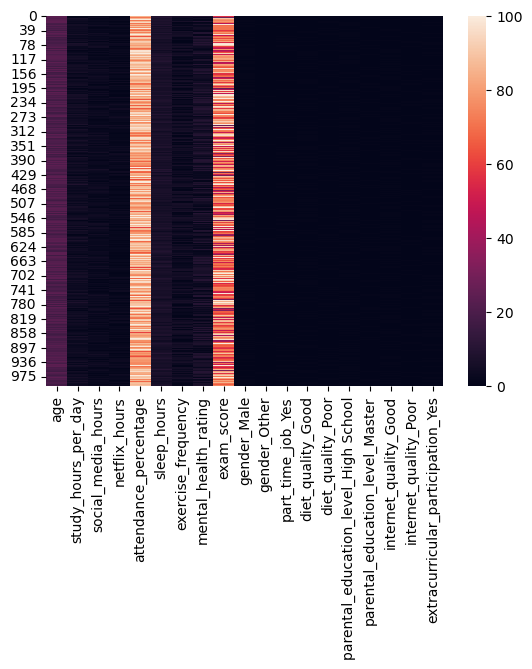

In [6]:
sns.heatmap(data_new)

In [7]:
data_new.corr()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907,0.025562,0.015309,-0.011680,-0.002006,-0.010192,-0.046363,-0.004842,0.029987,0.025087,-0.004993
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419,-0.025634,0.008814,-0.029133,-0.003565,-0.066777,0.000643,0.009009,0.001514,-0.026465,-0.003264
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733,-0.004995,0.015609,0.021224,0.026084,0.011390,0.028569,0.007508,0.046071,-0.010402,-0.018597
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779,0.000937,0.046266,0.009207,0.002406,0.021463,0.026835,-0.007959,0.030498,-0.036854,-0.005125
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836,-0.024108,-0.001184,-0.041771,-0.061024,0.033262,-0.026410,-0.072545,-0.021596,0.049536,-0.017778
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683,-0.024235,0.057166,0.001645,-0.024224,0.034733,-0.021355,0.001298,-0.002190,-0.006988,0.027693
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107,0.068207,-0.009269,-0.021679,0.024576,0.020647,0.029885,-0.039751,-0.030575,0.027076,-0.005681
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523,-0.006279,0.002810,0.013539,0.056837,0.019880,0.011014,-0.087748,-0.056385,0.019114,-0.004741
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000,-0.013191,0.012976,-0.026608,-0.010857,-0.041602,-0.002583,-0.040177,-0.050804,0.003016,0.000881
gender_Male,0.025562,-0.025634,-0.004995,0.000937,-0.024108,-0.024235,0.068207,-0.006279,-0.013191,1.000000,-0.199963,0.031409,0.019382,-0.027044,0.028773,0.007198,-0.033097,0.074586,-0.007248


In [8]:
data_new.columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score', 'gender_Male', 'gender_Other',
       'part_time_job_Yes', 'diet_quality_Good', 'diet_quality_Poor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'internet_quality_Good',
       'internet_quality_Poor', 'extracurricular_participation_Yes'],
      dtype='object')

In [9]:
x=data_new.drop('exam_score',axis=1)

In [10]:
y=data_new['exam_score']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
x_train.shape

(700, 18)

# Model : LinearRegression

In [13]:
model=LinearRegression()

In [14]:
model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred=model.predict(x_test)

# Errors :

In [16]:
print('The MSE is : ',mean_squared_error(y_test,y_pred))

The MSE is :  28.739364099659156


In [17]:
print('the r2_score is : ',r2_score(y_test,y_pred))

the r2_score is :  0.8965321985470138


In [18]:
print('the mean_absolute_error is : ',mean_absolute_error(y_test,y_pred))

the mean_absolute_error is :  4.269365434478847


# Slopes and Intercept:

In [19]:
print("The Slopes are : ",model.coef_)

The Slopes are :  [ 0.060482    9.58425265 -2.72594946 -2.37209678  0.14408943  2.00720878
  1.29112408  1.94748916  0.31310729  0.76006988  0.01927945 -0.99879793
 -0.61202648 -0.47369542 -0.06222113 -0.15015637 -0.08949783 -0.07846369]


In [20]:
print("The Intercept is : ",model.intercept_)

The Intercept is :  6.6306498267232215


# Plot

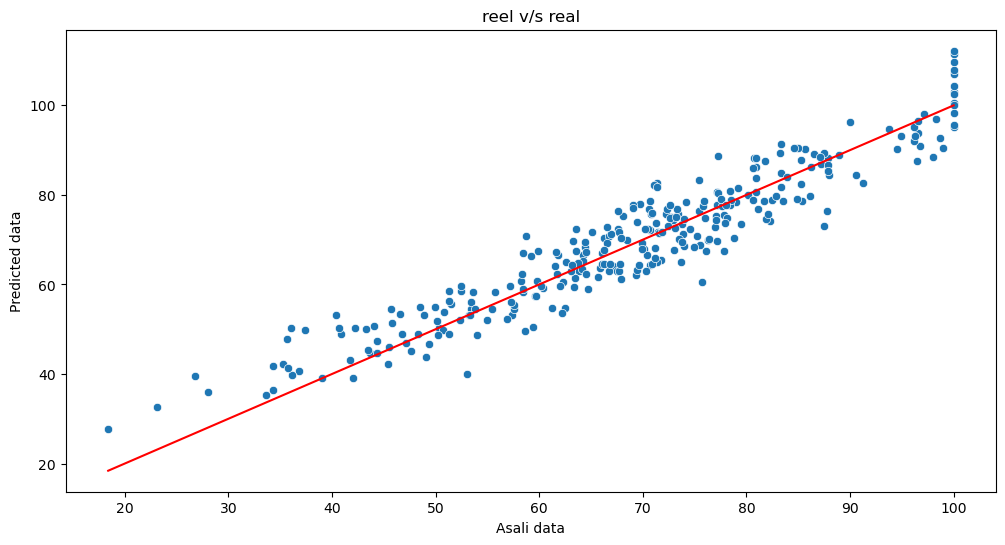

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.title('reel v/s real')
plt.xlabel('Asali data')
plt.ylabel('Predicted data')
plt.plot([y.min(),y.max()],[y.min(),y.max()],color='red')
plt.show()

# Data Augmentaion


In [23]:
df=pd.read_csv('student_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [24]:
num_features=['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']

In [25]:
aug_data=df[num_features].copy()

In [26]:
#Gaussian Noise:
for col in num_features:
  std_dev=df[col].std()*0.05
  noise=np.random.normal(scale=std_dev,loc=0,size=df.shape[0])
  aug_data[col]=df[col]+noise

In [27]:
aug_data['exam_score']=df['exam_score']
aug_data.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
0,22.921564,-0.011956,1.208474,1.145973,85.254578,7.938865,5.811384,8.009806,56.2
1,20.143496,6.787994,2.866994,2.283717,97.036459,4.569787,6.111387,7.885965,100.0
2,21.081247,1.257956,3.075250,1.264223,94.914382,8.020011,1.184687,1.054371,34.3
3,23.004183,1.227497,4.038607,0.964299,70.699955,9.212528,4.102865,1.148580,26.8
4,18.967534,4.980149,4.411698,0.450793,91.478462,5.087115,3.119050,1.095085,66.4


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(aug_data.iloc[:,0:8],aug_data.iloc[:,-1],test_size=0.3,random_state=42)
x_train

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating
541,17.928797,4.156423,3.774047,3.435642,85.224274,5.304783,2.000914,4.814854
440,17.049503,3.276551,0.251148,0.941432,100.120978,6.903870,3.910380,5.286333
482,20.870101,3.403715,1.548719,0.727412,79.271027,7.100388,1.113791,1.299825
422,21.912902,2.089715,2.449167,3.896260,67.459697,4.029417,3.026557,2.062672
778,23.926600,5.148623,0.454917,1.436058,89.784183,4.101144,3.702005,7.796866
...,...,...,...,...,...,...,...,...
106,21.972771,3.331707,0.376064,0.758446,83.030505,9.125392,6.179748,3.943964
270,22.262845,3.952865,3.211868,2.247323,96.436354,5.955366,4.060943,3.062319
860,19.998025,3.460949,3.829529,4.172123,99.552021,8.358142,1.082256,8.039554
435,24.172834,2.106809,-0.094350,3.087706,72.885319,6.307764,6.103910,2.950939


In [29]:
y_train

541     67.4
440     76.1
482     67.0
422     29.5
778    100.0
       ...  
106     82.3
270     63.0
860     65.6
435     58.3
102     60.8
Name: exam_score, Length: 700, dtype: float64

In [30]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()

In [31]:
model2.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=model2.predict(x_test)

In [33]:
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test,y_pred):.2f}")
print(f"R² Score: {r2_score(y_test,y_pred):.2f}")
print('the mean_absolute_error is : ',mean_absolute_error(y_test,y_pred))

Mean Squared Error (MSE): 29.12
R² Score: 0.90
the mean_absolute_error is :  4.2456668990111


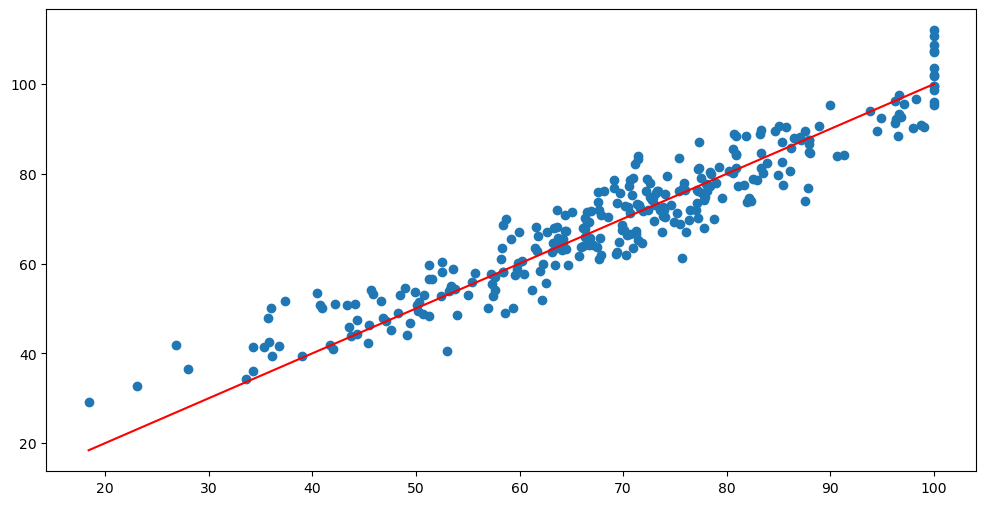

In [34]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')

# So Now it can be said that data augmentaion can be a important factor to train the model because without applyling the Data Augmentation but also  use the One_Hot_encoding And Standarization  we get the errors like    
'The MSE is :  28.739364099659124'
'the r2_score is :  0.8965321985470139'

But After Applying it we get :
         'Mean Squared Error (MSE): 29.09'
'R² Score: 0.90'...